In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import Digraph
sns.set(style="ticks")


In [16]:
# need a way to skip introduciton classes
def generateDict(file):
    d = {}
    with open(file) as f:
        for line in f:
            content = line.replace("\n", "").split(",")
            course = content[0]
            prerequisites = [x.strip() for x in content[1:]]
            prerequisites.sort(key=len, reverse=True)
            d[course] = prerequisites
    return d

def generateBarGraph(percentage):
    plt.figure(figsize=(26.5, 1))
    series = pd.Series(percentage)
    sns.barplot(x=series.values, y=series.index.astype(str), color="black")
    plt.xticks(range(0, 101, 10), size=20)
    plt.yticks([])
    sns.despine(left=True, bottom=True)
    plt.title("Course Progress for CS Major", fontsize = 30, fontfamily = "monospace")
    plt.savefig('bar_graph.pdf', bbox_inches='tight', pad_inches=0.1)
    return 1

def generateGraph(d):
    G = nx.DiGraph()
    for course in d:
        G.add_node(course)
        for prerequisite in d[course]:
            G.add_edge(course, prerequisite)
    return G

def generateStackedGraph(d):
    G = nx.DiGraph()
    for course in d:
        G.add_node(course)
        before_node = course
        for prerequisite in d[course]:
            G.add_edge(before_node, prerequisite)
            before_node = prerequisite 
    return G

def topologicalSort(G):
    return list(nx.topological_sort(G))

def drawGraph(G):
    dot = Digraph()
    for node in G.nodes():
        dot.node(node)
    for edge in G.edges():
        dot.edge(edge[0], edge[1])
    
    dot.graph_attr['ranksep'] = '7.5'
    dot.node_attr['shape'] = 'box'
    dot.node_attr['nodesep'] = '2'
    dot.graph_attr['rankdir'] = 'RL'
    dot.node_attr.update(fontsize='50')
    dot.graph_attr['size'] = '20,10'
    
    dot.render('course_pathway.gv', view=True)
    
def drawSemesterGraph(G):
    dot = Digraph()
    for node in G.nodes():
        dot.node(node)
    for edge in G.edges():
        dot.edge(edge[0], edge[1])
    
    dot.attr('node', shape='plain')
    
    dot.graph_attr['ranksep'] = '.3'
    dot.node_attr['shape'] = 'box'
    dot.graph_attr['rankdir'] = 'TB'
    dot.node_attr.update(fontsize='50')
    dot.graph_attr['size'] = '20,10'

    # title name edited on later
    dot.attr(label=" ", labelloc="tp", fontsize='75', fontname="monospace")

    
        
    dot.render('semesters.gv', view=True)
        
# stack pdf files
def stackPDFs():
    import PyPDF2
    pdfs = ['bar_graph.pdf','semesters.gv.pdf','course_pathway.gv.pdf']
    merger = PyPDF2.PdfMerger()
    for pdf in pdfs:
        merger.append(pdf)
    merger.write("output.pdf")
    merger.close()
    

In [17]:
file = "example_cs_major edit.txt" # course reqs in $course, $prerequisite1, $prerequisite2 form
d = generateDict(file)
G = generateGraph(d)
topology = topologicalSort(G)
drawGraph(G)

In [4]:
file = "personal.txt" # courses taken in $semester, $prerequisite1, $prerequisite2 form
d = generateDict(file)
H = generateStackedGraph(d)
topology = topologicalSort(H)
drawSemesterGraph(H)

1

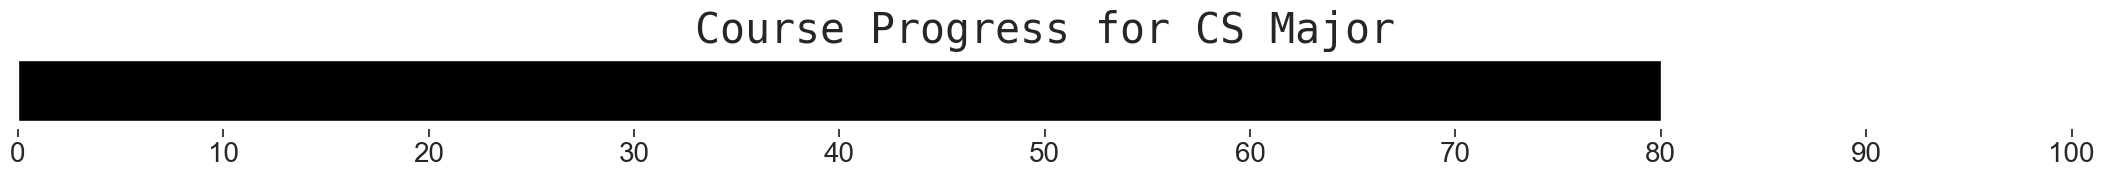

In [5]:
percentage = 80
generateBarGraph(percentage)

In [18]:
# stack pdf files
stackPDFs()

import os
os.open("output.pdf", os.O_RDWR)

11